# MVP - Draft do m√≥dulo 2 - Machine learning & Analytics

**Nome:** Marcia Valeria de Souza da Silva

**Matr√≠cula:** 40530010055_20250_01

**Dataset:** Churn operadora

#1 Descri√ß√£o
####Churn √© um termo utilizado em empresas operadoras de telecomunica√ß√µes que trata sobre a condi√ß√£o na qual um cliente deixa de utilizar os servi√ßos desta empresa.







#2 Objetivo
#### Identificar preventivamente quais clientes t√™m maior probabilidade de cancelar o  servi√ßo,  permitindo assim que a empresa possa tomar decis√µes para manter o cliente.

O dataset utilizado possui informa√ß√µes sobre os servi√ßos a serem contratados na empresa, sobre tipos de pagamentos do cliente e vari√°vel churn.

# 3 Atributos
####Foram coletados os dados do dataset  https://www.kaggle.com/datasets/blastchar/telco-customer-churn com informa√ß√µes dos servi√ßos prestados de uma operdora a aproximadamente 7040 clientes.


### 3.1 Descri√ß√£o dos Atributos
1.	**CustomerID** - ID do cliente
2.	**Gender** - male / female
3.	**Senior Citizen** - se o cliente √© idoso ou n√£o
4.	**Partner** - se o cliente tem um parceiro ou n√£o
5.	**Dependents** - se o cliente tem dependentes
6.	**Tenure** - N√∫mero de meses que o cliente permaneceu na empresa
7.	**Phone Service** - se o cliente tem servi√ßo de telefone
8.	**Multiple Lines** - se o cliente tem m√∫ltiplas linhas
9.	**Internet Service** se o cliente tem Servi√ßo de Internet
10.	**Online Security** - se o cliente tem servi√ßo de seguran√ßa na internet
11.	**Online Backup** - se o cliente tem servi√ßo de backup online
12.	**Device Protection** - Se o cliente tem prote√ß√£o do dispositivo
13.	**Tech Support** - Se o cliente tem suporte tecnico
14.	**Streaming TV** - Se o cliente tem Streaming de TV
15.	**Streaming Movies** - Se o cliente tem Streaming de filmes
16.	**Contract** - O prazo do contrato do cliente (m√™s a m√™s, um ano, dois anos)
17.	**Paperless Billing** - Se o cliente tem faturamento
18.	**Payment Method** - M√©todo de pagamento do cliente (cheque eletr√¥nico, cheque enviado pelo correio, transfer√™ncia banc√°ria (autom√°tica), cart√£o de cr√©dito
19.	**Monthly Charges** - O valor cobrado mensalmente ao cliente
20.	**Total Charges** - O valor total cobrado do cliente
21.	**Churn** - se o cliente saiu ou n√£o dos servi√ßos




# 4 Premissas e Hip√≥teses do Problema
###Prever se o cliente vai sair ou n√£o da operadora.

#### Clientes com contratos de curto prazo (Monthly Charges) pode ter maior propens√£o a cancelar em compara√ß√£o com contratos de longo prazo.

####Valores mensais elevados (MonthlyCharges) podem estar associados a maior insatisfa√ß√£o e, portanto, a maior Churn.

####Clientes idosos (SeniorCitizen) podem ser menos propensos a mudar de servi√ßo devido √† menor familiaridade com alternativas.

####A falta de servi√ßos adicionais (como suporte t√©cnico, backup online, seguran√ßa) pode aumentar a probabilidade de cancelamento.

####Formas de pagamento autom√°ticas (como cart√£o de cr√©dito ou d√©bito autom√°tico) podem indicar maior fidelidade e menor Churn.


## 4.1 Tipo de Tarefa

###Cen√°rio com classifica√ß√£o supervisionada. Considerando os atributos disponibilizados prever se o cliente poder√° praticar churn.

##4.2 Restri√ß√µes e Condi√ß√µes

####Atributos como PhoneService e InternetService indicam que alguns clientes podem ter apenas um tipo de servi√ßo, o que pode influenciar no padr√£o de Churn.
####O dataset apresenta ser um extrato completo de uma base de clientes ativos e inativos.

####N√£o adotado restri√ß√µes expl√≠citas na sele√ß√£o de dados.

#5 Biblioteca e carga dos dados

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms # para tratamento de missings
# Transforma√ß√µes Num√©ricas
from sklearn.preprocessing import StandardScaler #padroniza√ß√£o
from sklearn.preprocessing import MinMaxScaler # normaliza√ß√£o
# Transforma√ß√µes Categ√≥ricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.preprocessing import LabelEncoder # Label Encoder
#Testes e classifica√ß√µes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.dummy import DummyClassifier


url_dados = 'https://raw.githubusercontent.com/MarciaValeria2110/MVP_Machine_Learning_-_Analytics/refs/heads/main/clientes_Churn.csv'

labels_atributos = ['CustomerID','Gender','SeniorCitizen','Partner','Dependents','Tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

servicos = pd.read_csv(url_dados, names=labels_atributos, skiprows=1, delimiter=',')

# Drop CustomerID column as it is not needed for modeling
servicos = servicos.drop('CustomerID', axis=1)

In [ ]:
# @title
# Vers√£o da matplotlib utilizada
mpl.__version__

'3.10.0'

In [ ]:
# @title
# para ignorar warning
import warnings
warnings.filterwarnings("ignore")

## 5.1 Dataframe
####Dataframe utilizando a biblioteca pandas.

In [ ]:
# @title
# Informa√ß√£o do Dataframe
type(servicos)

pandas.core.frame.DataFrame

# 6 An√°lise de Dados
### Na An√°lise Explorat√≥ria sobre o dataset foi analisado as caracter√≠sticas das vari√°veis que influenciam a pr√°tica do churn.

## 6.1 Tipo de Inst√¢ncias
### o dasaset possui 7044 inst√¢ncias com atributos num√©ricos e categ√≥ricos.

In [ ]:
# @title
print(f"Total de inst√¢ncias: {len(servicos)}")
print("\nTipos de dados por coluna:")
print(servicos.info())

Total de inst√¢ncias: 7043

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   

In [ ]:
# atualizando o Dtype dos atributos
servicos = pd.read_csv('https://raw.githubusercontent.com/MarciaValeria2110/MVP_Machine_Learning_-_Analytics/refs/heads/main/clientes_Churn.csv')

# Drop CustomerID column as it is not needed for modeling
servicos = servicos.drop('CustomerID', axis=1)

# Converter 'TotalCharges' para float64 (tratando poss√≠veis erros com coer√ß√£o)
servicos['TotalCharges'] = pd.to_numeric(servicos['TotalCharges'], errors='coerce')

# Convert 'SeniorCitizen' back to int64 or float64 for modeling
servicos['SeniorCitizen'] = servicos['SeniorCitizen'].astype(int)

# Verificar os tipos atualizados
print(servicos.dtypes)

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


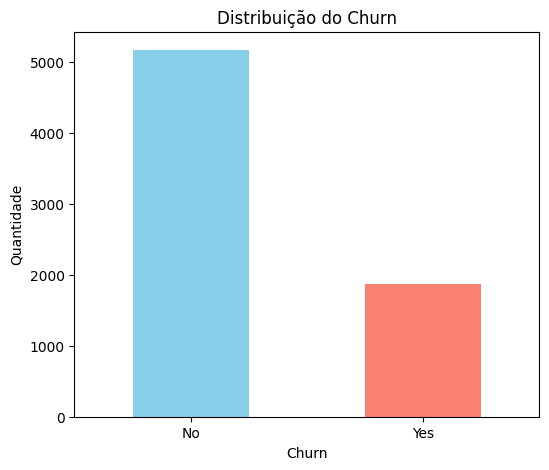

In [ ]:
# Gr√°fico com distribui√ß√£o do churn
plt.figure(figsize=(6, 5))
servicos['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribui√ß√£o do Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

#7 Est√°tisticas Descritivas
 Nesta est√°tistica veremos as dimens√µes do dataset, informa√ß√µes de colunas e linhas.

In [ ]:
# @title
# Mostra as 6 primeiras linhas do dataset com as informa√ß√µes dos seus atributos
servicos.head(6)

Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   
5  Female              0      No         No       8          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   
5              Yes           Electronic check           99.65        820.50   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes

In [ ]:
# Contagem dos servi√ßo utilizando as pr√°ticas de POO
from abc import ABC, abstractmethod
from typing import List, Dict, Any


In [ ]:
class DataAnalyzer(ABC):
    """Classe abstrata para an√°lise de dados"""

    def __init__(self, data: pd.DataFrame):
        self.data = data

    @abstractmethod
    def analyze(self):
        pass

    @abstractmethod
    def visualize(self):
        pass

class ServicesAnalyzer(DataAnalyzer):
    """Analisador espec√≠fico para dados de servi√ßos"""
    def __init__(self, data: pd.DataFrame, custom_columns: List[str] = None):
        super().__init__(data)
        self.services_columns = custom_columns or [
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies'
        ]
        self.analysis_results = {}

    def analyze(self) -> Dict[str, Any]:
        """Realiza an√°lise estat√≠stica das colunas de servi√ßos"""
        print("=== AN√ÅLISE DE SERVI√áOS ===")

        for col in self.services_columns:
            if col in self.data.columns:
                value_counts = self.data[col].value_counts()
                self.analysis_results[col] = value_counts

                print(f"\n{col}:")
                print(value_counts)
                print("-" * 30)
            else:
                print(f"‚ö†Ô∏è Coluna '{col}' n√£o encontrada no dataset")

        return self.analysis_results

    def visualize(self, figsize: tuple = (15, 12)) -> None:
        """Cria visualiza√ß√£o dos dados analisados"""
        if not self.analysis_results:
            print("‚ö†Ô∏è Execute analyze() antes de visualizar")
            return

        plt.style.use('default')
        fig, axes = plt.subplots(3, 3, figsize=figsize)
        axes = axes.flatten()

        services_to_plot = self.services_columns[:9]

        for i, col in enumerate(services_to_plot):
            if col in self.analysis_results:
                counts = self.analysis_results[col]
                axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
                axes[i].set_title(f'Distribui√ß√£o de {col}')
            else:
                axes[i].text(0.5, 0.5, f'Dados de {col}\nn√£o dispon√≠veis',
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{col} - Dados Ausentes')

        plt.tight_layout()
        plt.show()

    def get_summary(self) -> Dict[str, int]:
        """Retorna resumo estat√≠stico"""
        summary = {}
        for col, counts in self.analysis_results.items():
            summary[col] = {
                'total_observations': counts.sum(),
                'unique_categories': len(counts),
                'most_frequent': counts.index[0],
                'most_frequent_count': counts.iloc[0]
            }
        return summary

In [ ]:
def get_summary(self) -> Dict[str, int]:
        """Retorna resumo estat√≠stico"""
        summary = {}
        for col, counts in self.analysis_results.items():
            summary[col] = {
                'total_observations': counts.sum(),
                'unique_categories': len(counts),
                'most_frequent': counts.index[0],
                'most_frequent_count': counts.iloc[0]
            }
        return summary

class AnalysisFactory:
    """Factory para criar diferentes tipos de analisadores"""

    @staticmethod
    def create_services_analyzer(data: pd.DataFrame,
                               custom_columns: List[str] = None) -> ServicesAnalyzer:
        """Cria um analisador de servi√ßos"""
        return ServicesAnalyzer(data, custom_columns)

=== AN√ÅLISE DE SERVI√áOS ===

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------

TechSupport:
TechSupport
No 

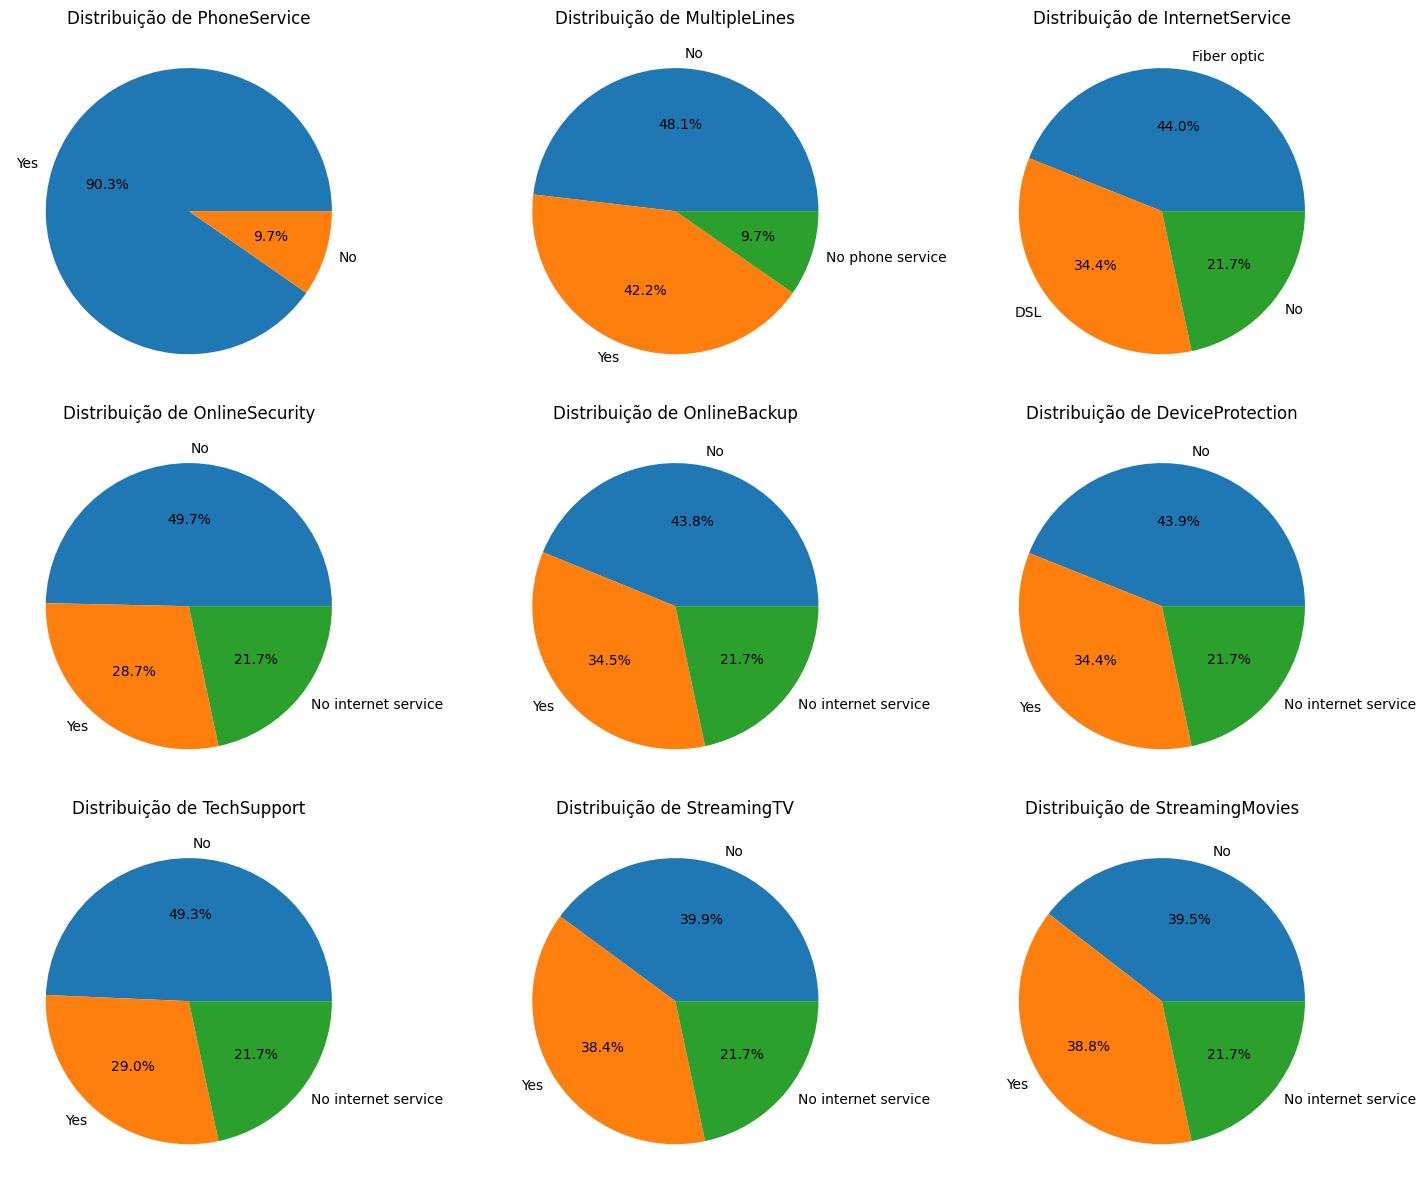


=== RESUMO ESTAT√çSTICO ===

PhoneService:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 2
  Mais frequente: Yes (6361)

MultipleLines:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (3390)

InternetService:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: Fiber optic (3096)

OnlineSecurity:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (3498)

OnlineBackup:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (3088)

DeviceProtection:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (3095)

TechSupport:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (3473)

StreamingTV:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (2810)

StreamingMovies:
  Total de observa√ß√µes: 7043
  Categorias √∫nicas: 3
  Mais frequente: No (2785)


In [ ]:
def main():
    # Supondo que 'servicos' seja seu DataFrame
    # servicos = pd.read_csv('url_dados')


 # Criando o analisador usando Factory
    analyzer = AnalysisFactory.create_services_analyzer(servicos)

    # Realizando an√°lise
    results = analyzer.analyze()

# Gerando visualiza√ß√£o
    analyzer.visualize()

    # Obtendo resumo
    summary = analyzer.get_summary()
    print("\n=== RESUMO ESTAT√çSTICO ===")
    for service, stats in summary.items():
        print(f"\n{service}:")
        print(f"  Total de observa√ß√µes: {stats['total_observations']}")
        print(f"  Categorias √∫nicas: {stats['unique_categories']}")
        print(f"  Mais frequente: {stats['most_frequent']} ({stats['most_frequent_count']})")


if __name__ == "__main__":
    main()

In [ ]:
# Contagem de cada servi√ßo individualmente
services_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in services_columns:
    print(f"\n{col}:")
    print(servicos[col].value_counts())
    print("-" * 30)


PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------

TechSupport:
TechSupport
No                     3473
Yes  

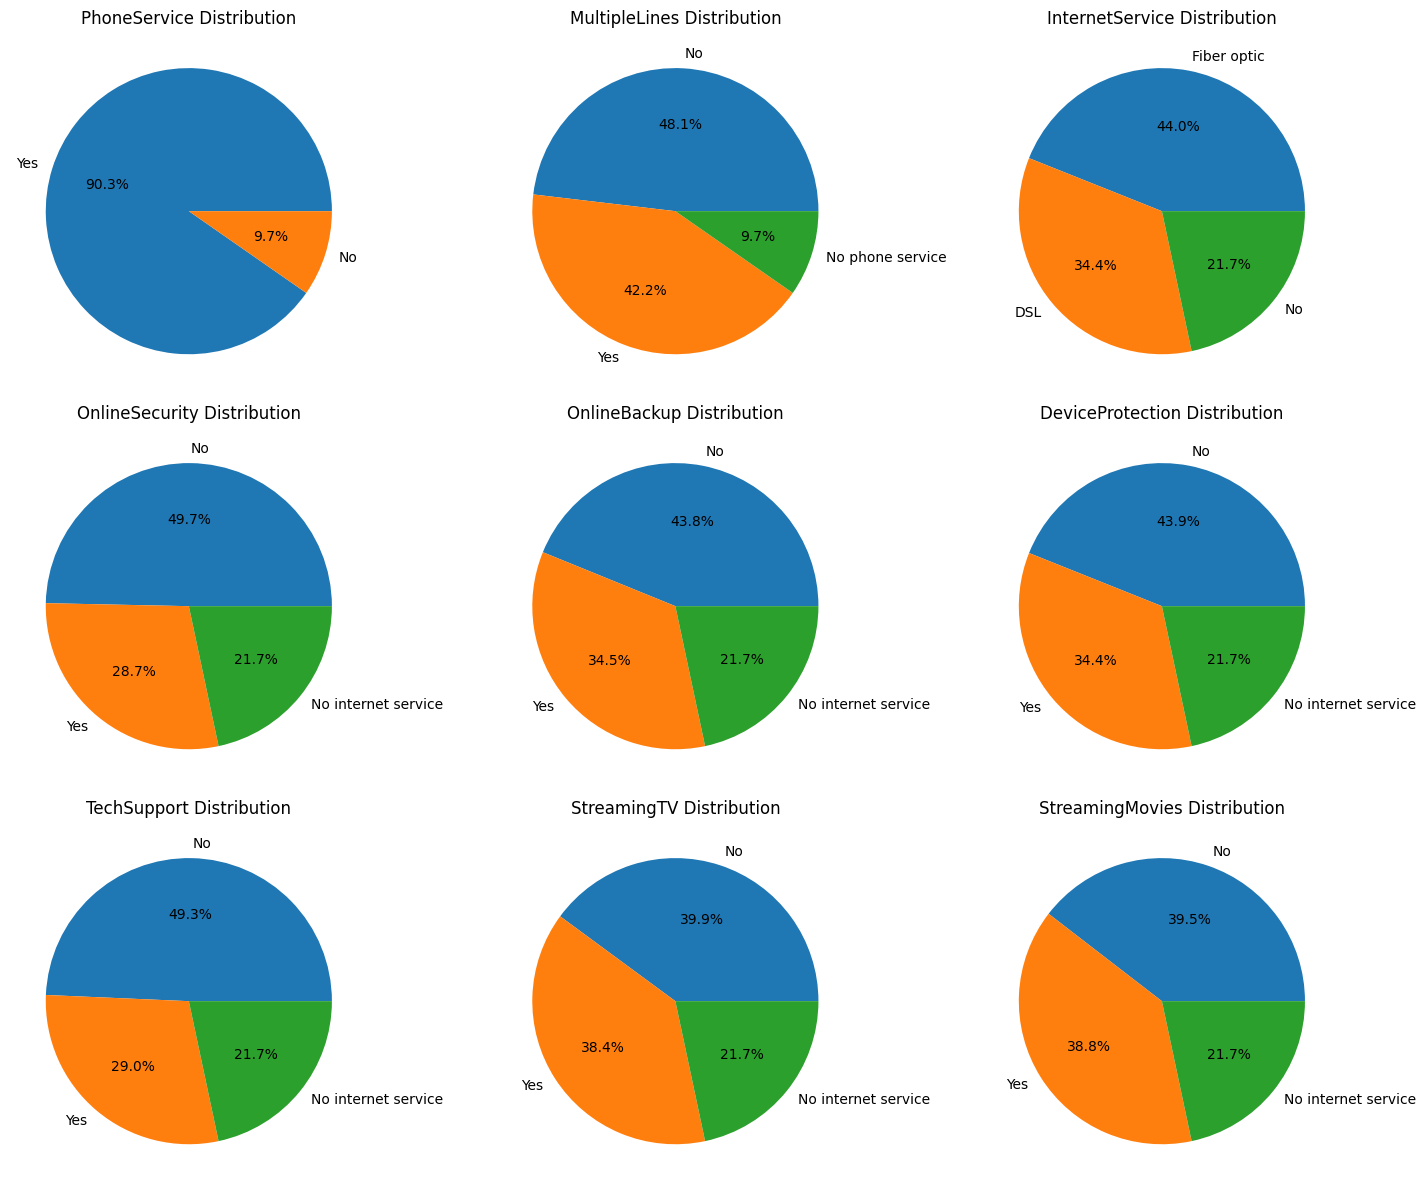

In [ ]:
# Gr√°fico para visualiza√ß√£o da distribui√ß√£o dos servi√ßos
plt.style.use('default')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

services_to_plot = services_columns[:9]

for i, col in enumerate(services_to_plot):
    counts = servicos[col].value_counts()
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

#ver se mant√©m este heatmap

#8 Limpeza- TRATAMENTO DE MISSIG

In [ ]:
servicos.head()

Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
servicos.isnull().sum()


Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# exibindo as dimens√µes do dataset
print(servicos.shape)

(7043, 20)


In [ ]:
# eliminando linhas que tenham ALGUM valor missing
servicos.dropna(how='any', inplace=True)

In [ ]:
print(servicos.shape)

(7032, 20)


In [ ]:
servicos.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#textualizar

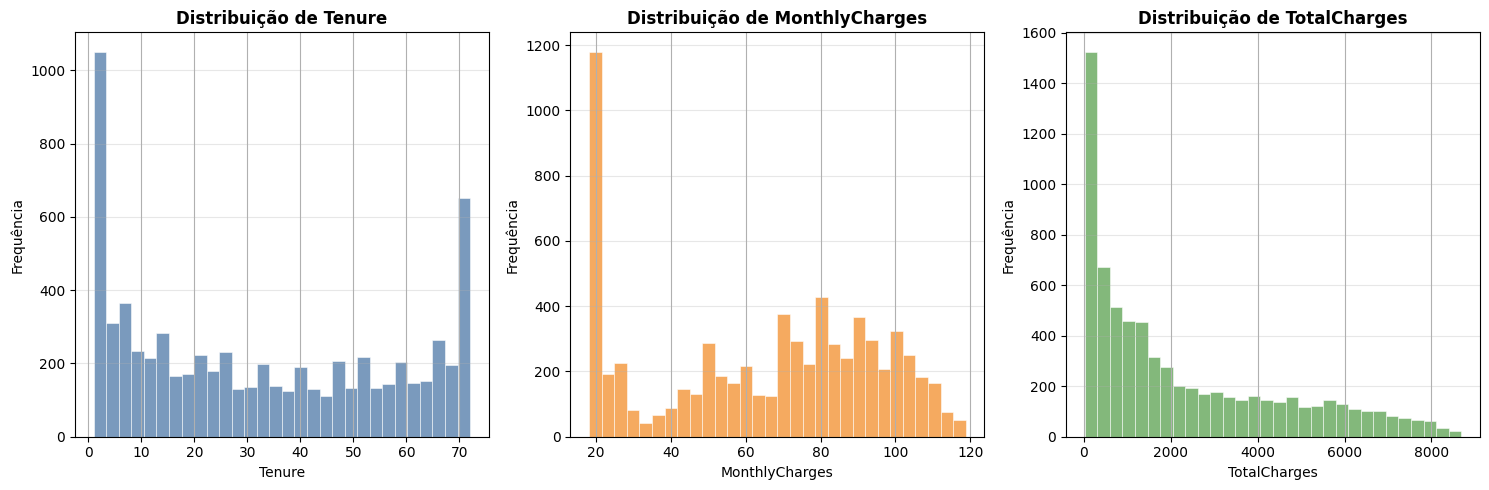

In [ ]:
# G√°fico de vari√°veis num√©ricas
numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
servicos_num = servicos[numeric_cols].copy()
servicos_num['TotalCharges'] = pd.to_numeric(servicos_num['TotalCharges'], errors='coerce')

colors = ['#4e79a7', '#f28e2b', '#59a14f']

plt.figure(figsize=(15, 5))
# Plot only the first 3 numeric columns to fit the 1x3 subplot layout
for i, col in enumerate(numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    servicos_num[col].hist(bins=30, color=colors[i-1], alpha=0.75,
                          edgecolor='white', linewidth=0.5)

    plt.title(f'Distribui√ß√£o de {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

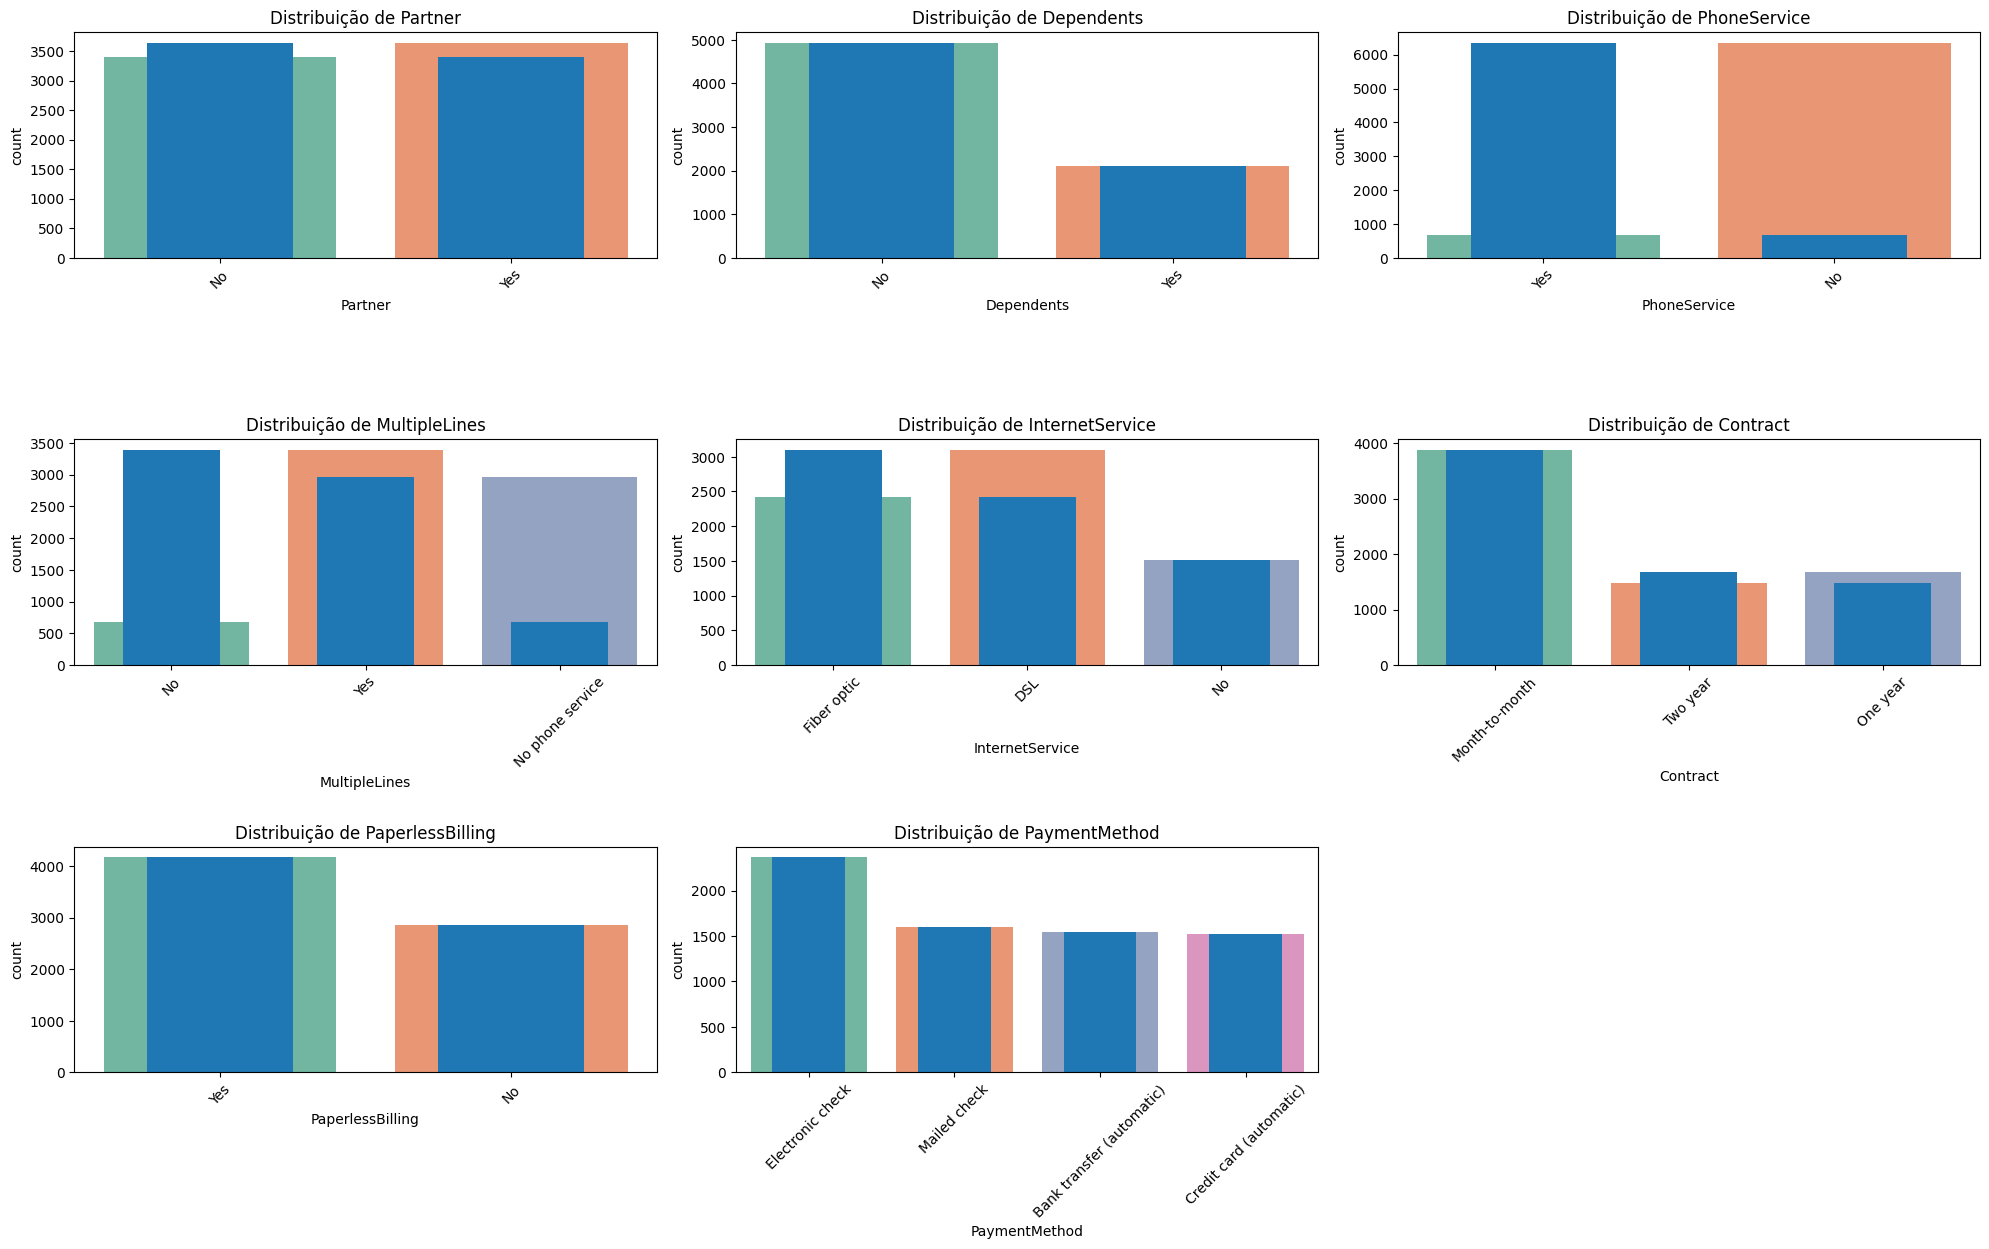

In [ ]:
# G√°fico de vari√°veis categ√≥ricas
categorical_cols = ['Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=servicos, x=col, palette='Set2')
    servicos[col].value_counts().plot(kind='bar')
    plt.title(f'Distribui√ß√£o de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#9 Prepara√ß√£o dos dados

In [ ]:

#x remove a coluna churn do dataframe e y mant√©m a vari√°vel target para previs√£o
X = servicos.drop('Churn', axis=1) # attributes
y = servicos['Churn'] # churn

#Preparando as colunas categ√≥ricas e num√©ricas para os futuros tratamentos
# Identifica as colunas categ√≥ricas e num√©ricas para os futuros tratamentos
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Aplicando one-hot encoding para as vari√°veis categ√≥ricas em colunas bin√°rias
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Matem as colunas num√©ricas e as transformadas categ√≥ricas em n√∫mericas
X_numeric_and_encoded = pd.concat([X[numerical_cols], X_encoded], axis=1)

#9.1 Treino , Teste e Valida√ß√£o

###Feito a divis√£o considerando 80% para treino e 20% para teste com o objetivo de futuramente treinar um modelo de machine learnig e poder realizar previs√µes nos testes, usando as m√©tricas pertinentes como por exemplo de Acur√°cia.

###Testes realizados utilizando a biblioteca sklearn.model_selection train_test

In [ ]:
# Divis√£o em conjuntos de treino(80%) e teste(20%)
# Now split the preprocessed X and the target y
X_train, X_test, y_train, y_test = train_test_split(X_numeric_and_encoded, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
print("\nResultadoPr√©-processamento")
print(f"Dimens√µes de X_train: {X_train.shape}")
print(f"Dimens√µes de X_teste: {X_test.shape}")
print(f"Dimens√µes de y_train: {y_train.shape}")
print(f"Dimens√µes de y_test: {y_test.shape}")


ResultadoPr√©-processamento
Dimens√µes de X_train: (5625, 34)
Dimens√µes de X_teste: (1407, 34)
Dimens√µes de y_train: (5625,)
Dimens√µes de y_test: (1407,)


##Metricas de avalia√ß√£o
#### Avaliando para identificar as m√©tricas que apresentam o melhor desempenho

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Fazer previs√µes
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva


Text(0.5, 500.7222222222223, 'Previs√£o')

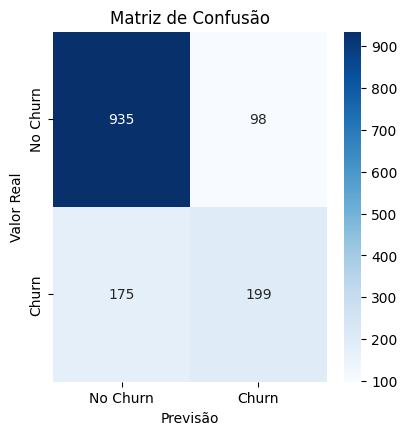

In [ ]:
# Matriz de confus√£o
plt.figure(figsize=(15, 10))

# Subplot 1: Matriz de Confus√£o
plt.subplot(2, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confus√£o')
plt.ylabel('Valor Real')
plt.xlabel('Previs√£o')

# detalhamento do desempenho do modelo, mostrando, para cada classe, o n√∫mero
# de classifica√ß√µes:
# verdadeiro negativo(VN) = 935
# falso positivo (FP)= 98
# falso negativo (FN) = 175
# verdadeiro positivo (VP)= 199

#Considerando a Acur√°cia temos 80% (VP + VN) / (VP + VN + FP + FN)
# Recall baixo de 53% (VP / (VP + FN))
# Precis√£o de 67% (VP / (VP + FP))


In [ ]:
# Relat√≥rio de Classifica√ß√£o do modelo para as m√©tricas(Precis√£o, Recall)
# No Churn: Clientes que n√£o cancelaram o servi√ßo
# Churn: Clientes que cancelaram o servi√ßo
# macro avg: M√©dia simples entre as classes

# Plot das m√©tricas
metrics = ['precision', 'recall']
classes = ['No Churn', 'Churn', 'macro avg']
x = np.arange(len(classes))
width = 0.25



###

###Relat√≥rio de Classifica√ß√£o por Classe e M√©trica
####Gr√°fico de m√©tricas de precis√£o e recall

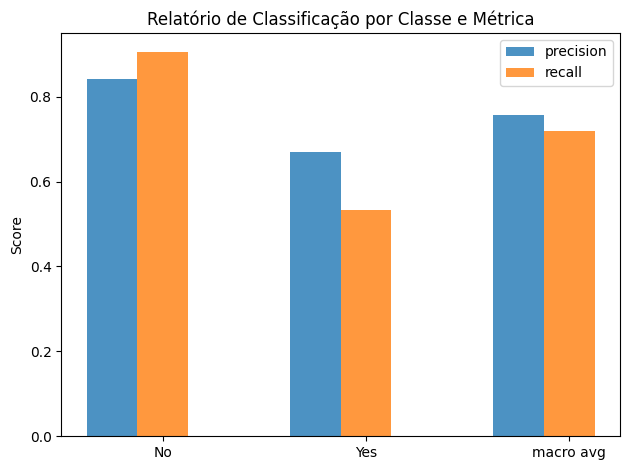

In [ ]:
# Relat√≥rio de Classifica√ß√£o do modelo para as m√©tricas(Precis√£o, Recall)
# No Churn: Clientes que n√£o cancelaram o servi√ßo
# Churn: Clientes que cancelaram o servi√ßo
# macro avg: M√©dia simples entre as classes

# Plot das m√©tricas
metrics = ['precision', 'recall']
classes = ['No Churn', 'Churn', 'macro avg']
x = np.arange(len(classes))
width = 0.25

# Generate the classification report and store it in report_servicos
report_servicos = classification_report(y_test, y_pred, output_dict=True)

for i, metric in enumerate(metrics):
    values = [report_servicos[cls][metric] for cls in ['No', 'Yes']] + [report_servicos['macro avg'][metric]] # Access metrics correctly
    plt.bar(x + i*width, values, width, label=metric, alpha=0.8)

plt.ylabel('Score')
plt.title('Relat√≥rio de Classifica√ß√£o por Classe e M√©trica')
plt.xticks(x + width, ['No', 'Yes', 'macro avg']) # Correct xticks labels
plt.legend()
plt.tight_layout()

###Curva ROC

####Gr√°fico indicando o desempenho do modelo de AUC = 84% sendo considerado uma boa performance.

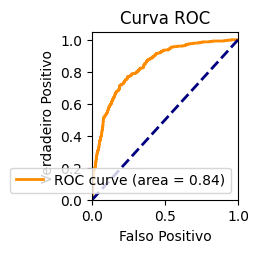

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Curva ROC
plt.subplot(2, 3, 3)

# Encode the target variable for the test set
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

####O Gr√°fico informando o valor de AUC = 0.659, considerado um desempenho moderado

(0.0, 1.05)

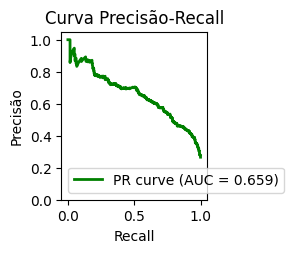

In [ ]:
# Curva precis√£o/recall
plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precis√£o')
plt.title('Curva Precis√£o-Recall')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])


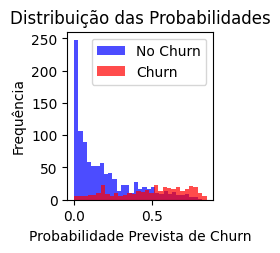

In [ ]:
# 6. DISTRIBUI√á√ÉO DAS PROBABILIDADES
plt.subplot(2, 3, 5)
plt.hist(y_pred_proba[y_test_encoded == 0], bins=30, alpha=0.7, label='No Churn', color='blue')
plt.hist(y_pred_proba[y_test_encoded == 1], bins=30, alpha=0.7, label='Churn', color='red')
plt.xlabel('Probabilidade Prevista de Churn')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o das Probabilidades')
plt.legend()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

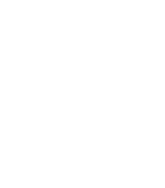

In [ ]:
# 7. SCORE GERAL DO MODELO
plt.subplot(2, 3, 6)
plt.axis('off')

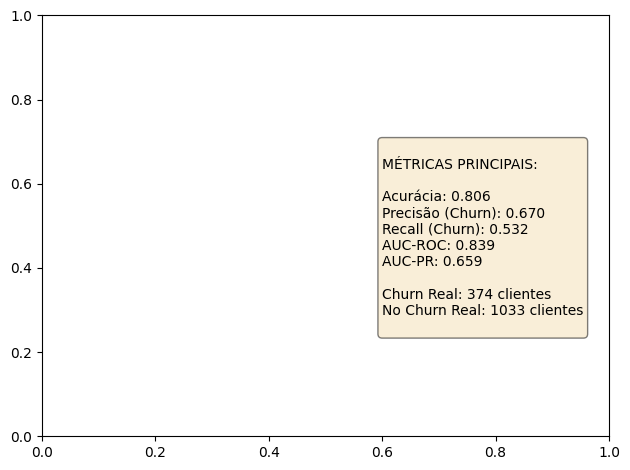

In [ ]:
# Calcular m√©tricas principais
# Encode y_pred
y_pred_encoded = label_encoder.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision_pos = report_servicos['Yes']['precision']  # Precis√£o para Churn
recall_pos = report_servicos['Yes']['recall']        # Recall para Churn

metrics_text = f"""
M√âTRICAS PRINCIPAIS:

Acur√°cia: {accuracy:.3f}
Precis√£o (Churn): {precision_pos:.3f}
Recall (Churn): {recall_pos:.3f}
AUC-ROC: {roc_auc:.3f}
AUC-PR: {pr_auc:.3f}

Churn Real: {sum(y_test_encoded == 1)} clientes
No Churn Real: {sum(y_test_encoded == 0)} clientes
"""

plt.text(0.6, 0.7, metrics_text, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# baseline - modelo 2
üìà O que os Baselines mostram:
Most Frequent: Sempre prever a classe mais comum

Stratified: Prever aleatoriamente mantendo a distribui√ß√£o das classes

Uniform: Prever aleatoriamente com igual probabilidade

Regras simples: Baseadas em conhecimento do dom√≠nio

# balanceamento
O que Esperar:
Melhoria no Recall: O modelo dever√° detectar melhor a classe minorit√°ria

Poss√≠vel redu√ß√£o na Precision: Pode aumentar falsos positivos

AUC PR: Espera-se uma melhoria em rela√ß√£o aos 0.659 anteriores

Execute o c√≥digo e me mostre o novo resultado do AUC! Vamos ver quanto conseguimos melhorar.

In [ ]:
# Vers√£o r√°pida para teste
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)


# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)


# Treinar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Avaliar
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_proba)
pr_auc = auc(recall, precision)

print(f"AUC com SMOTE: {pr_auc:.3f}")

AUC com SMOTE: 0.588


###Baseline - modelo 1

###Utilizado a estrat√©gia DummyClassifier ...

###atualizarxxxx    O DummyClassifier √© uma ferramenta fundamental no kit de um cientista de dados para avalia√ß√£o de modelos de Machine Learning.

#O que √© o DummyClassifier?
#Em portugu√™s, seria algo como "Classificador Ing√™nuo" ou "Classificador de Refer√™ncia". Ele √© um modelo de classifica√ß√£o muito simples que faz previs√µes usando regras b√°sicas e sem aprender nenhum padr√£o real dos dados.

#A utilidade principal do DummyClassifier √© servir como benchmark (ponto de refer√™ncia).

#Analogia: Imagine que voc√™ est√° construindo um carro de F√≥rmula 1. Para saber se ele √© bom, voc√™ n√£o o compara com uma bicicleta. Voc√™ o compara com o carro do ano anterior ou com o carro de um concorrente direto. O DummyClassifier √© esse "carro b√°sico" contra o qual voc√™ compara seu "carro de F√≥rmula 1" (seu modelo complexo).

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
#BASELINES SIMPLES (Estrat√©gias de Refer√™ncia)
def create_baseline_models(X_train, y_train, X_test, y_test):
    """
    Cria modelos baseline simples para compara√ß√£o
    """
    baselines = {}

In [ ]:
    # Verificar distribui√ß√£o das classes
    class_distribution = Counter(y_train)
    majority_class = max(class_distribution, key=class_distribution.get)
    majority_ratio = class_distribution[majority_class] / len(y_train)

In [ ]:
print("="*60)
print("AN√ÅLISE DA DISTRIBUI√á√ÉO DAS CLASSES")
print("="*60)
print(f"Total de inst√¢ncias: {len(y_train)}")
print(f"Classe majorit√°ria: '{majority_class}' - {class_distribution[majority_class]} inst√¢ncias ({majority_ratio:.1%})")
print(f"Classe minorit√°ria: {[(k, v) for k, v in class_distribution.items() if k != majority_class]}")
print()

AN√ÅLISE DA DISTRIBUI√á√ÉO DAS CLASSES
Total de inst√¢ncias: 5625
Classe majorit√°ria: 'No' - 4130 inst√¢ncias (73.4%)
Classe minorit√°ria: [('Yes', 1495)]



In [ ]:
    # Estrat√©gias do DummyClassifier
    strategies = [
        ('Most Frequent', 'most_frequent'),
        ('Stratified', 'stratified'),
        ('Uniform Random', 'uniform'),
        ('Constant (Churn=Yes)', 'constant', {'constant': 'Yes'})
    ]

    baseline_results = []


    for strategy in strategies:
        if strategy[1] == 'constant':
            dummy = DummyClassifier(strategy=strategy[1], constant=strategy[2]['constant'])
            model_name = strategy[0]
        else:
            dummy = DummyClassifier(strategy=strategy[1])
            model_name = strategy[0]



# Treinar e prever
        dummy.fit(X_train, y_train)
        y_pred = dummy.predict(X_test)

        # Calcular m√©tricas
        accuracy = accuracy_score(y_test, y_pred)

In [ ]:
        print(f"\n=== {model_name} ===")
        print(f"Acur√°cia: {accuracy:.4f}")
        print("\nMatriz de Confus√£o:")
        print(confusion_matrix(y_test, y_pred))
        print("\nRelat√≥rio de Classifica√ß√£o:")
        print(classification_report(y_test, y_pred))

        baseline_results.append({
            'Model': model_name,
            'Accuracy': accuracy,
        })


=== Constant (Churn=Yes) ===
Acur√°cia: 0.2658

Matriz de Confus√£o:
[[   0 1033]
 [   0  374]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00      1033
         Yes       0.27      1.00      0.42       374

    accuracy                           0.27      1407
   macro avg       0.13      0.50      0.21      1407
weighted avg       0.07      0.27      0.11      1407



### Balanceamento

##9.2 Valida√ß√£o cruzada
### Faz sentido utilizar tamb√©m um m√©todo de valida√ß√£o cruzada, pelo motivo de que a divis√£o dos treino 80/20 realizada pode ter varia√ß√µes que venham a camuflar o desempenho real do modelo.

###Neste caso est√° sendo realizado em 10 folds para depois ser utilizados nos modelos com os  algoritimos KNN, √Årvore de Classifica√ß√£o, Naive Bayes e SVM, e podendo assim fazer uma compara√ß√£o entre todos esses resultados.



In [ ]:
# Criando os folds para a valida√ß√£o cruzada
num_particoes = 10 # n√∫mero de folds da valida√ß√£o cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

#Verifique quais opera√ß√µes de transforma√ß√£o de dados (como normaliza√ß√£o e padroniza√ß√£o, transforma√ß√£o de imagens em tensores) s√£o mais apropriadas para o seu problema e salve vis√µes diferentes do seu dataset para posterior avalia√ß√£o dos modelos.

#Hiperparametros
####Modelagem

####Treinando os modelos com os algoritmo KNN, √Årvore deClassifica√ß√£o, Naive Bayes e SVM, para classifica√ß√£o e resultado m√©dio da acur√°cia.

KNN: 0.765156 (0.009469)
CART: 0.722663 (0.019712)
NB: 0.683727 (0.017191)
SVM: 0.734224 (0.013391)


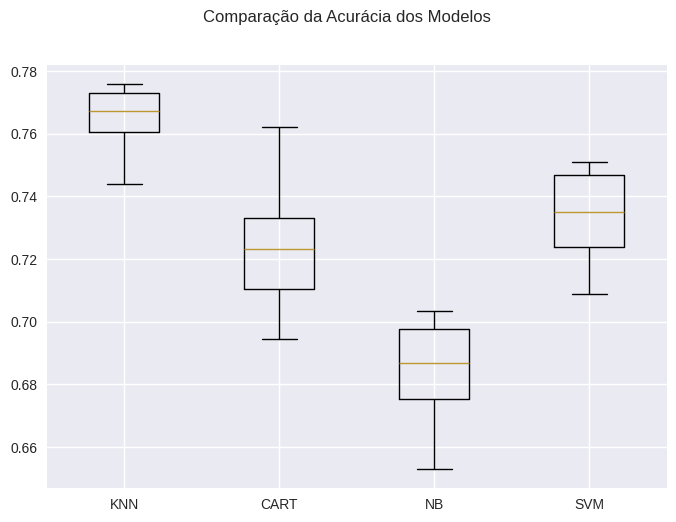

In [ ]:
# Modelagem

# Definindo uma seed global para esta c√©lula de c√≥digo
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # m√©dia e desvio padr√£o dos 10 resultados da valida√ß√£o cruzada
  print(msg)

# Boxplot de compara√ß√£o dos modelos
fig = plt.figure()
fig.suptitle('Compara√ß√£o da Acur√°cia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####Considerando a acur√°cia m√©dia do modelo treinado KNN  que apresentou os melhores resultados (76% de acur√°cia m√©dia e desvio-padr√£o de 2.2%).

####Construindo  um novo modelo, treinado com toda a base de treino.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predi√ß√µes com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acur√°cia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.668088130774698


####O treinamento com o modelo Gaussiani teve uma acur√°cia de 66,8%. Valor este que pode ser melhor com treinos em outros modelos.

In [ ]:
# Separa√ß√£o em bases de treino e teste (holdout)
# array = servicos.values
#X = X_numeric_and_encoded # attributes
#y = servicos['Churn'] # churn

In [ ]:

# SelectKBest

# Sele√ß√£o de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a fun√ß√£o de pontua√ß√£o em (X, y) e obt√©m os atributos selecionados
fit = best_var.fit(X_numeric_and_encoded, y)

# Reduz X para os atributos selecionados
features = fit.transform(X_numeric_and_encoded)


# Resultados
print('\nN√∫mero original de atributos:', X.shape[1])
print('\nN√∫mero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", servicos.columns[0:19])

# Exibe as pontua√ß√µes de cada atributos e os 4 escolhidas (com as pontua√ß√µes mais altas)
#com 3 casas decimais
print("\nScores dos Atributos Originais:")
scores_formatados = [f"{score:.3f}" for score in fit.scores_]
print(scores_formatados)

print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X_numeric_and_encoded.columns))


N√∫mero original de atributos: 19

N√∫mero reduzido de atributos: 4

Atributos Originais: Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Scores dos Atributos Originais:
['163.012', '1007.509', '271.577', '291.345', '163.012', '1007.509', '271.577', '291.345', '0.513', '161.776', '192.189', '0.961', '0.961', '11.285', '733.952', '383.982', '383.982', '212.445', '383.982', '47.949', '383.982', '30.937', '383.982', '196.052', '383.982', '28.240', '383.982', '26.135', '230.628', '703.210', '267.488', '129.884', '702.709', '58.406']

Atributos Selecionados: ['Tenure' 'Tenure' 'InternetService_Fiber optic' 'Contract_Two year']


In [ ]:
# Elimina√ß√£o Recursiva de Atributos

# Cria√ß√£o do modelo
modelo = LogisticRegression(max_iter=200)

# Elimina√ß√£o Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X_numeric_and_encoded, y)

# Print dos resultados
print("Atributos Originais:", servicos.columns[0:19])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados : %s" % fit.support_)
print("\nRanking dos Atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)

print("\nAtributos Selecionados :")
print(X_numeric_and_encoded.columns[fit.support_])

Atributos Originais: Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Atributos Selecionados : [False False False False False False False False False False False False
 False False  True False False False False False False False False False
  True False False False  True  True False False False False]

Ranking dos Atributos: [20 24 28 31 18 22 26 30 23 29 10  9 19 21  1 16 15  2  6  7 12 25 11  5
  1 14  4 17  1  1  8 13  3 27]

Qtd de melhores Atributos: 4

Atributos Selecionados :
Index(['InternetService_Fiber optic', 'StreamingTV_No internet service',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')



Import√¢ncia dos Atributos:


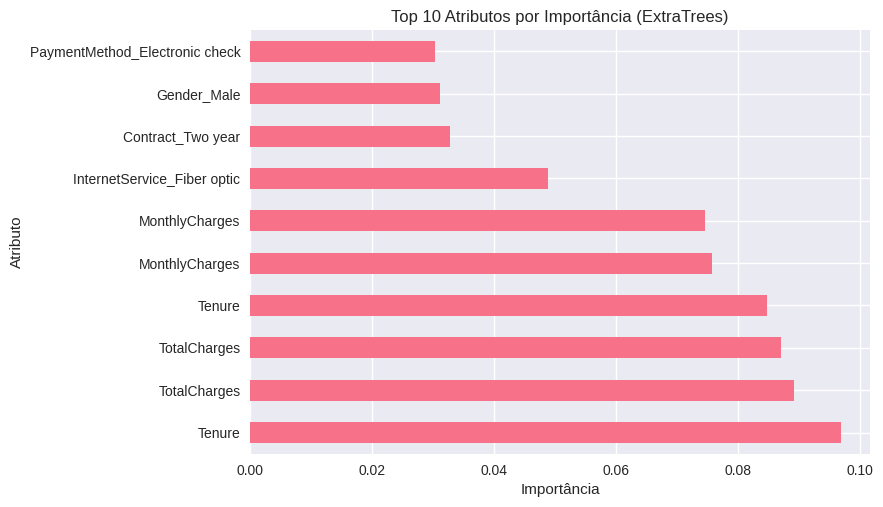


Pontua√ß√£o de import√¢ncia para cada atributo:
[0.0119916  0.08466144 0.07456751 0.08909011 0.01266954 0.09678676
 0.07574479 0.08703144 0.03113361 0.02633505 0.02120383 0.00383875
 0.00404607 0.02041777 0.04879514 0.00466516 0.00584707 0.02492042
 0.00384327 0.0235107  0.00313217 0.02104079 0.00531727 0.0243842
 0.00623681 0.01793659 0.00681587 0.01851229 0.02651376 0.03281437
 0.02690462 0.01529536 0.03035483 0.01364102]


In [ ]:
# Import√¢ncia de Atributos com ExtraTrees

# Cria√ß√£o do modelo para sele√ß√£o de atributos
modelo = ExtraTreesClassifier(n_estimators=100, random_state=7) # Added random_state for reproducibility
modelo.fit(X_numeric_and_encoded, y)

# Exibe os atributos orginais
# Print the feature importances along with the corresponding feature names
print("\nImport√¢ncia dos Atributos:")
feature_importances = pd.Series(modelo.feature_importances_, index=X_numeric_and_encoded.columns)
feature_importances.nlargest(10).plot(kind='barh') # Plot top 10 features
plt.title('Top 10 Atributos por Import√¢ncia (ExtraTrees)')
plt.xlabel('Import√¢ncia')
plt.ylabel('Atributo')
plt.show()

# Exibe a pontua√ß√£o de import√¢ncia para cada atributo (quanto maior a pontua√ß√£o, mais importante √© o atributo).
print("\nPontua√ß√£o de import√¢ncia para cada atributo:")
print(modelo.feature_importances_)

#Recursos avan√ßados

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 9 # semente aleat√≥ria

# Separa√ß√£o em conjuntos de treino e teste
# array = servicos.values
X = X_numeric_and_encoded # Use the one-hot encoded features
y = servicos['Churn'] # Use the target variable from the original dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratifica√ß√£o

# Par√¢metros e parti√ß√µes da valida√ß√£o cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # valida√ß√£o cruzada com estratifica√ß√£o

###Feature Selection
‚Ä¢	Refine a quantidade de atributos dispon√≠veis, realizando o processo de feature selection de forma adequada.
comente

In [ ]:
np.random.seed(9) # definindo uma semente global

# Lista que armazenar√° os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [ ]:
# Definindo os par√¢metros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

###Ensembles
### Voting
### Utilizando o ensemble do tipo Voting para combinar as predi√ß√µes dos modelos Logistic Regression, Arvore de decis√£o e SVM.

In [ ]:
# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

#Modelos de Ensemble
###Criando 6 tipos de Ensemles para a aplica√ß√£o dos algoritimo nos modelos. Esses algoritimos visam uma melhor escolha na decis√£o do modelo a ser utilizado na predi√ß√£o.

In [ ]:
# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

In [ ]:
# Listas para armazenar os resultados
results = []
names = []

In [ ]:
# Avalia√ß√£o dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.806222 (0.009378)
KNN: 0.766582 (0.010822)
CART: 0.729598 (0.015644)
NB: 0.678941 (0.014239)
SVM: 0.734223 (0.000653)
Bagging: 0.786135 (0.012669)
RF: 0.795735 (0.009909)
ET: 0.783470 (0.010022)
Ada: 0.803732 (0.007762)
GB: 0.802309 (0.008773)
Voting: 0.788800 (0.009411)


Avalia√ß√£o dos modelos:

Tendo como melhor resultado LR 80%, Ada e GB foram bem pr√≥ximos de LR.

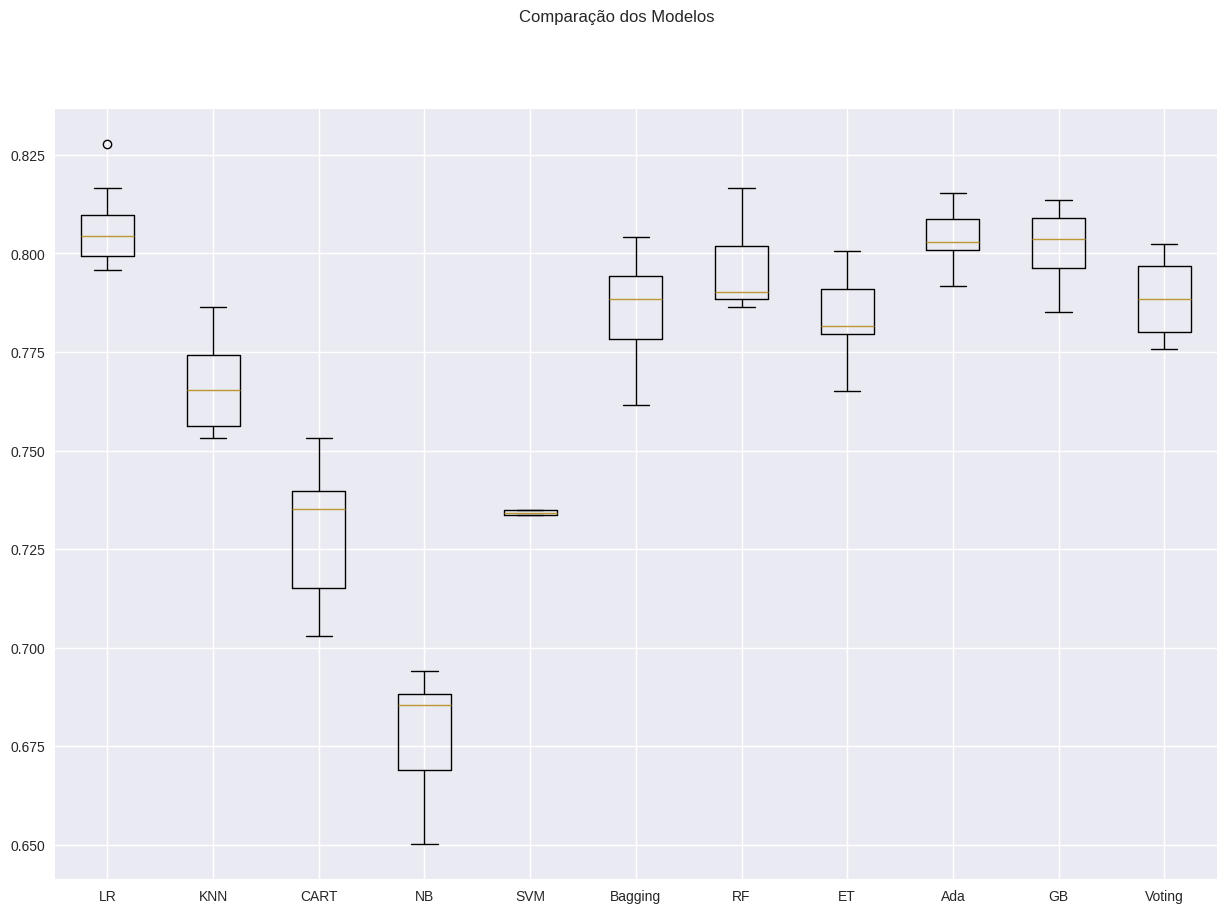

In [ ]:
# Boxplot de compara√ß√£o dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Compara√ß√£o dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

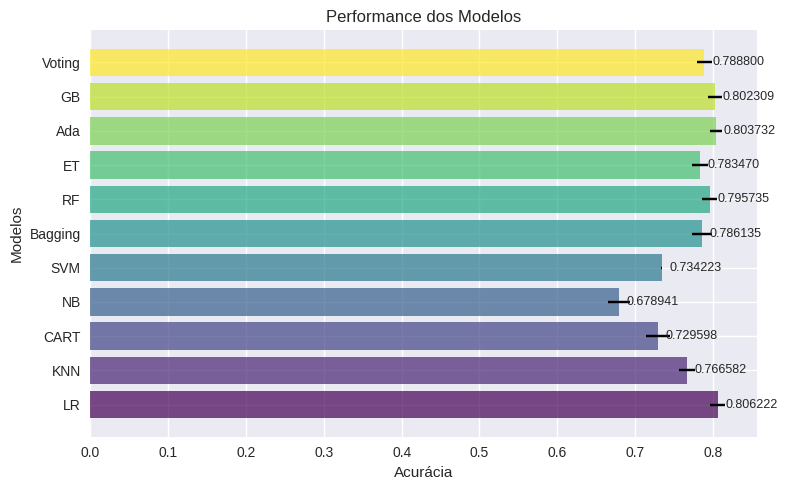

Resultados dos Modelos:
----------------------------------------
LR: 0.806222 (¬±0.009378)
KNN: 0.766582 (¬±0.010822)
CART: 0.729598 (¬±0.015644)
NB: 0.678941 (¬±0.014239)
SVM: 0.734223 (¬±0.000653)
Bagging: 0.786135 (¬±0.012669)
RF: 0.795735 (¬±0.009909)
ET: 0.783470 (¬±0.010022)
Ada: 0.803732 (¬±0.007762)
GB: 0.802309 (¬±0.008773)
Voting: 0.788800 (¬±0.009411)

Melhor modelo: LR
Pior modelo: NB


In [ ]:
# Gr√°fico de barras horizontais

# Define the variables based on the results from the previous cell
modelos = names
acuracias = [result.mean() for result in results]
desvios = [result.std() for result in results]

plt.figure(figsize=(8, 5))
bars = plt.barh(modelos, acuracias, xerr=desvios, capsize=5, alpha=0.7,
                color=plt.cm.viridis(np.linspace(0, 1, len(modelos))))

plt.xlabel('Acur√°cia')
plt.ylabel('Modelos')
plt.title('Performance dos Modelos')

# Adicionar valores
for i, v in enumerate(acuracias):
    plt.text(v + 0.01, i, f'{v:.6f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print dos resultados
print("Resultados dos Modelos:")
print("-" * 40)
for i, modelo in enumerate(modelos):
    print(f"{modelo}: {acuracias[i]:.6f} (¬±{desvios[i]:.6f})")

print(f"\nMelhor modelo: {modelos[acuracias.index(max(acuracias))]}")
print(f"Pior modelo: {modelos[acuracias.index(min(acuracias))]}")

##cria√ß√£o e avalia√ß√£o dos modelos : dados padronizados e normalizados (Pipeline)

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as vis√µes do dataset
pipelines = []
results = []
names = []

In [ ]:
# Criando os elementos do pipeline

# Algoritmos que ser√£o utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transforma√ß√µes que ser√£o utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

In [ ]:
# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))


In [ ]:
# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

In [ ]:
# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

In [ ]:
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

LR-orig: 0.806 (0.009)
KNN-orig: 0.767 (0.011)
CART-orig: 0.730 (0.016)
NB-orig: 0.679 (0.014)
SVM-orig: 0.734 (0.001)
Bag-orig: 0.786 (0.013)
RF-orig: 0.796 (0.010)
ET-orig: 0.783 (0.010)
Ada-orig: 0.804 (0.008)
GB-orig: 0.802 (0.009)
Vot-orig: 0.789 (0.009)
LR-padr: 0.807 (0.011)
KNN-padr: 0.760 (0.015)
CART-padr: 0.731 (0.012)
NB-padr: 0.679 (0.015)
SVM-padr: 0.800 (0.012)
Bag-padr: 0.789 (0.009)
RF-padr: 0.794 (0.011)
ET-padr: 0.786 (0.013)
Ada-padr: 0.804 (0.008)
GB-padr: 0.802 (0.009)
Vot-padr: 0.805 (0.014)
LR-norm: 0.807 (0.011)
KNN-norm: 0.757 (0.017)
CART-norm: 0.732 (0.014)
NB-norm: 0.679 (0.015)
SVM-norm: 0.800 (0.013)
Bag-norm: 0.784 (0.008)
RF-norm: 0.792 (0.012)
ET-norm: 0.781 (0.011)
Ada-norm: 0.804 (0.008)
GB-norm: 0.802 (0.009)
Vot-norm: 0.802 (0.012)


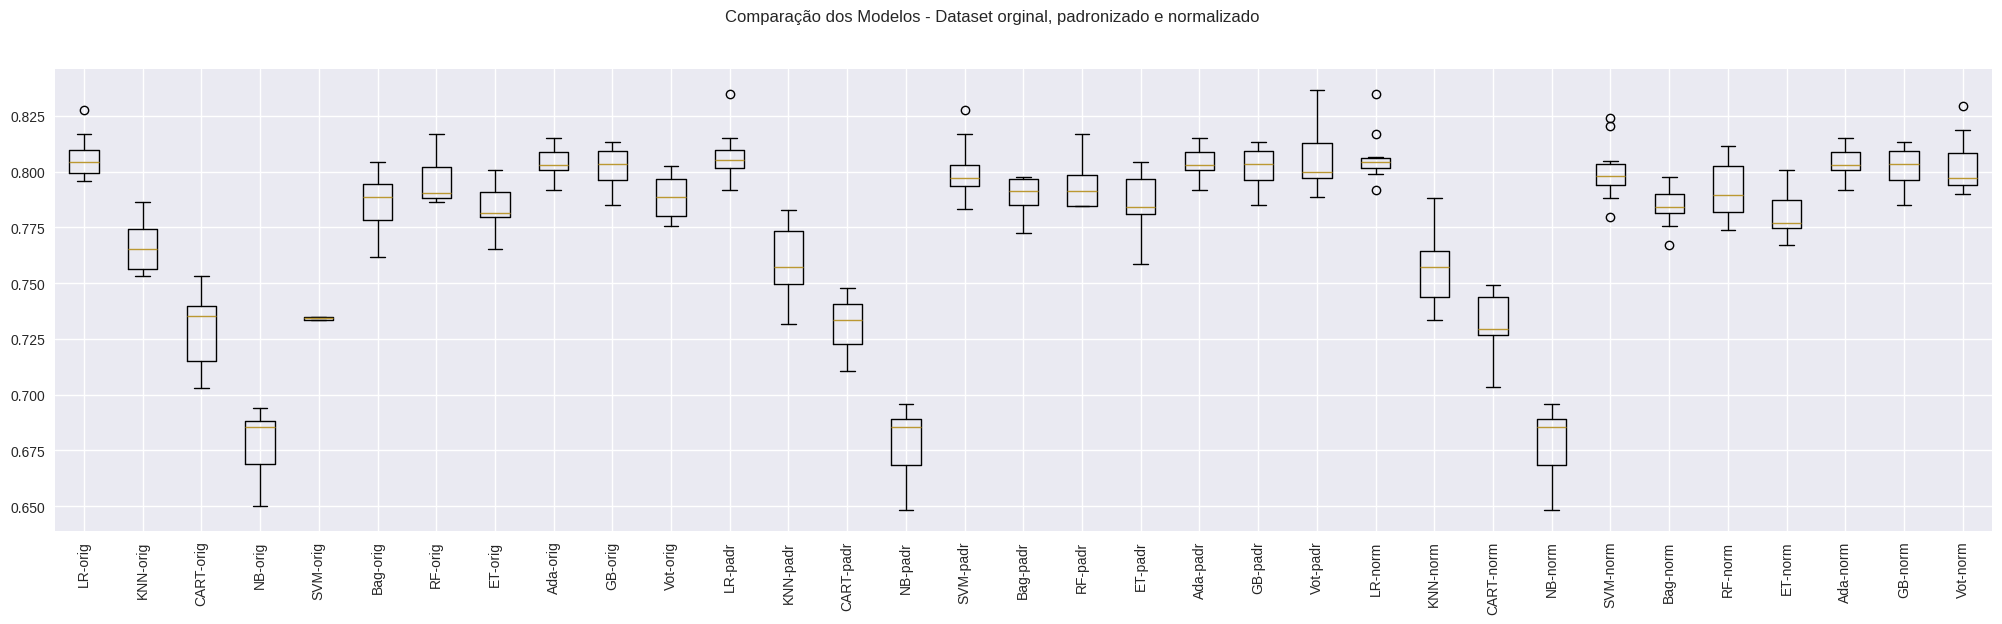

In [ ]:
# Boxplot de compara√ß√£o dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Compara√ß√£o dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

##otimiza√ß√£o de hiperparametros

In [ ]:
# Tuning do KNN

np.random.seed(9) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

In [ ]:
pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}


In [ ]:
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configura√ß√£o
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.785956 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-padr - Melhor: 0.793070 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.791468 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


###Finaliza√ß√£o do modelo

In [ ]:
# Avalia√ß√£o do modelo com o conjunto de testes

# Prepara√ß√£o do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplica√ß√£o da padroniza√ß√£o no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acur√°cia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplica√ß√£o da padroniza√ß√£o no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7981520966595593


In [ ]:
# Prepara√ß√£o do modelo com TODO o dataset
scaler = StandardScaler().fit(X_numeric_and_encoded) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_numeric_and_encoded) # aplica√ß√£o da padroniza√ß√£o com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

#incluir neste mvp
Modelagem e treinamento:

Objetivo: construir modelos para resolver o problema em quest√£o.

‚Ä¢	Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.

‚Ä¢	H√° algum ajuste inicial para os hiperpar√¢metros?

‚Ä¢	O modelo foi devidamente treinado? Foi observado problema de underfitting?

‚Ä¢	√â poss√≠vel otimizar os hiperpar√¢metros de algum dos modelos? Se sim, fa√ßa-o, justificando todas as escolhas.

‚Ä¢	H√° algum m√©todo avan√ßado ou mais complexo que possa ser avaliado?

‚Ä¢	Posso criar um comit√™ de modelos diferentes para o problema (ensembles)?


Avalia√ß√£o de Resultados:

Objetivo: analisar o desempenho dos modelos gerados em dados n√£o vistos (com a base de teste)

‚Ä¢	Selecione as m√©tricas de avalia√ß√£o condizentes com o problema, justificando.

‚Ä¢	Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.

‚Ä¢	Os resultados fazem sentido?

‚Ä¢	Foi observado algum problema de overfitting?

‚Ä¢	Compare os resultados de diferentes modelos.

‚Ä¢	Descreva a melhor solu√ß√£o encontrada, justificando.


Calculando as est√°tisticas separadamente

#6 Conclus√£o
    descrever